In [46]:
# General
import pandas as pd
import numpy as np
import datetime
import os
import glob
import sqlite3
from math import ceil
import zipfile

# Data viz
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing
from sklearn.preprocessing import StandardScaler

# clustering
from sklearn.cluster import KMeans

In [75]:
df = pd.read_csv('../data/MACIMIDE_Global_Expatriate_Dual_Citizenship_Dataset_V5.00.csv')

#saves the WDIData table without extracting the zip file
with zipfile.ZipFile('../data/WDI_csv.zip') as myzip:
    wdi = pd.read_csv(myzip.open('WDIData.csv'),usecols = range(65))
    country = pd.read_csv(myzip.open('WDICountry.csv'))
    ind = pd.read_csv(myzip.open('WDISeries.csv'))

In [3]:
cname = wdi.drop_duplicates(subset='Country Name')['Country Name']
wdi = wdi.loc[~wdi['Country Name'].isin(cname[:49])]

In [4]:
country_old = df.loc[df.world_region.isna()]['country'].unique()
df = df.loc[~df['country'].isin(country_old)]
def world_region(x):
    if x == 1:
        return 'Africa'
    elif x == 2:
        return 'Asia'
    elif x == 3:
        return 'Europe'
    elif x== 6:
        return 'Oceania'
    else:
        return 'America'    
    
df['world_region'] = df['world_region'].apply(lambda x:world_region(x) )
df = df.query('Year >= 2000 & Year <2020')


In [5]:
America = ["United States of America",'Canada','Mexico','Brazil', 'Colombia','Chile','Argentina']
Europe = ['Italy', 'Germany', 'Denmark', 'Poland', 'United Kingdom (of Great Britain and Northern Ireland)','France','Netherlands']
Extreme_Orient = ['China',  'Thailand', 'Australia', 'India',  'Azerbaijan','Japan']
Africa = ['South Africa', 'Djibouti', 'Morocco', 'Nigeria', 'Botswana']
Countries = [c for i in (America,Europe,Africa,Extreme_Orient) for c in i]

df_country = df.copy()
df_country = df.loc[df['country'].isin((Countries))]
len(df_country['country'].unique())

25

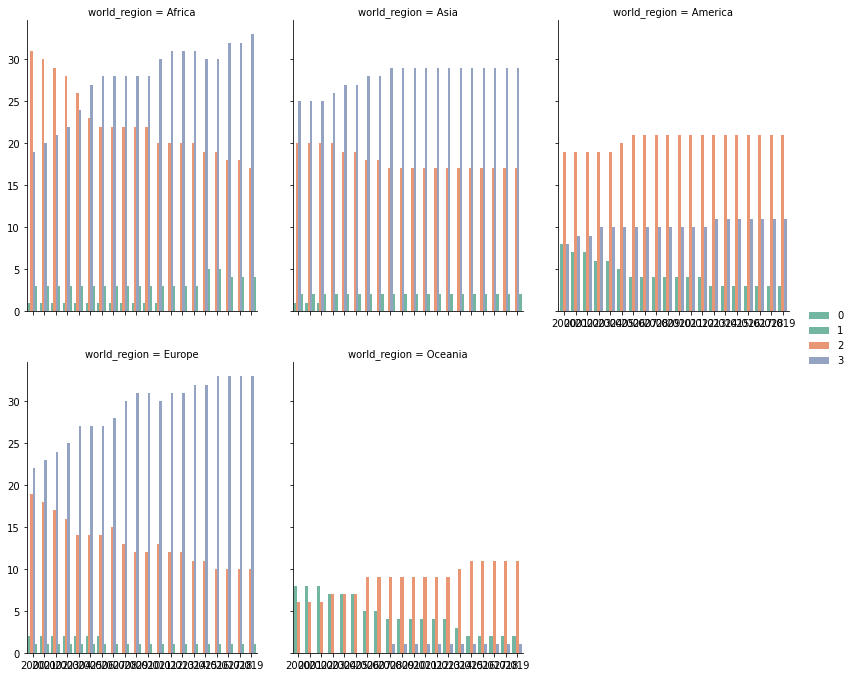

In [6]:
df_year = df.query('Year >=2012 & Year<=2018')

g = sns.FacetGrid(df_year,col='world_region',col_wrap = 3,legend_out=True)
g = (g.map_dataframe(sns.countplot,x='Year',hue='Dualcit_grouped', palette =sns.color_palette("Set2", 3) ).add_legend())
g.fig.set_figwidth(12)
g.fig.set_figheight(10)
plt.show()



In [7]:
def boxplot(year,indicator_code):
   
    df_year = df.loc[df['Year']==year]
    wdi_year = wdi[['Country Code','Indicator Code','Indicator Name',str(year),'Country Name']].loc[wdi['Indicator Code'] == indicator_code]
    df_year = df_year.merge(wdi_year, right_on='Country Code',left_on = 'ISO3' )
    
    fig,ax= plt.subplots(1,2,figsize=(15,5))
    box1 = sns.boxplot(data=df_year,x='Dualcit_binary',y=(df_year[str(year)]),ax = ax[0])
    box2 = sns.boxplot(data=df_year,x='Dualcit_grouped',y=(df_year[str(year)]),ax = ax[1])
    fig.suptitle((df_year['Indicator Name'].unique()))
    box1.set_ylabel('')
    #ax.set_xticklabels(['Automatic Loss','No Automatic Loss'])
    return 

In [8]:
indic_full = wdi[['Country Code','Indicator Code','Indicator Name','2014','Country Name']].groupby('Indicator Name').count()['2014'].sort_values(ascending=False)
indic_full = indic_full[indic_full>180]
indic_full[141:145]


Indicator Name
Survival to age 65, female (% of cohort)                                                           194
Survival to age 65, male (% of cohort)                                                             194
PM2.5 pollution, population exposed to levels exceeding WHO Interim Target-2 value (% of total)    194
GDP, PPP (current international $)                                                                 194
Name: 2014, dtype: int64

In [9]:
indicators = wdi[['Indicator Code','Indicator Name']].set_index('Indicator Code').drop_duplicates()
pd.options.display.max_colwidth = 200
indicators.loc[indicators['Indicator Name'].str.contains('rights')]
#indicators to look SG.VAW.REFU.ZS - SI.POV.GINI - SP.POP.TECH.RD.P6 - per_allsp.adq_pop_tot
                    #- per_allsp.ben_q1_tot - SL.TLF.CACT.FM.NE.ZS
#maybe SE.TER.CUAT.DO.FE.ZS  - per_allsp.cov_pop_tot - SL.TLF.TOTL.FE.ZS -  SL.UEM.1524.NE.ZS         

,Indicator Name
Indicator Code,
IQ.CPA.PROP.XQ,CPIA property rights and rule-based governance rating (1=low to 6=high)
IC.LGL.CRED.XQ,Strength of legal rights index (0=weak to 12=strong)


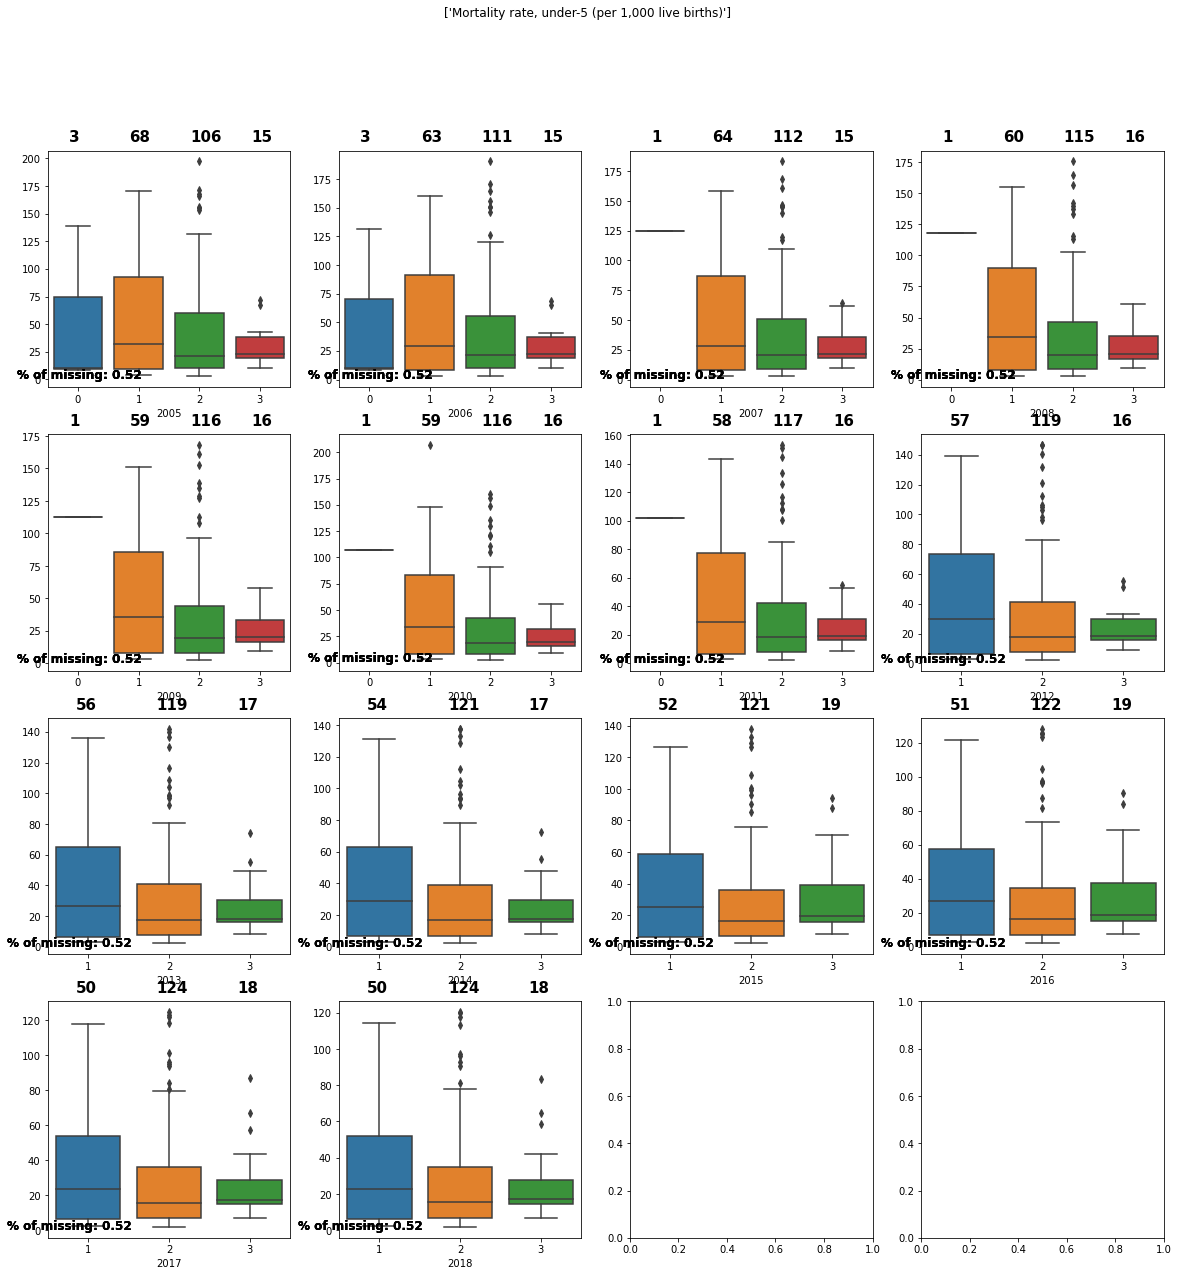

In [10]:
boxplot(2014,'IC.LGL.CRED.XQ')

In [17]:
America = ["nited States of America",'Canada','Mexico','Brazil', 'Colombia']
Europe = ['Italy', 'Germany', 'Denmark', 'Poland', 'United Kingdom (of Great Britain and Northern Ireland)']
Extreme Orient = ['China',  'Thailand', 'Australia', 'India',  'Azerbaijan']
Africa = ['South Africa', 'Djibouti', 'Morocco', 'Nigeria', 'Botswana']

In [16]:
df.loc[df['world_region']=='Africa']['country'].unique()

array(['Zimbabwe', 'Zambia', 'Uganda', 'Tunisia', 'Togo', 'Tanzania',
       'Swaziland', 'Sudan', 'South Sudan', 'South Africa', 'Somalia',
       'Sierra Leone', 'Seychelles', 'Senegal', 'Sao Tome and Principe',
       'Rwanda', 'Nigeria', 'Niger', 'Namibia', 'Mozambique', 'Morocco',
       'Mauritius', 'Mauritania', 'Mali', 'Malawi', 'Madagascar', 'Libya',
       'Liberia', 'Lesotho', 'Kenya', 'Guinea-Bissau', 'Guinea', 'Ghana',
       'Gambia', 'Gabon', 'Ethiopia', 'Eritrea', 'Equatorial Guinea',
       'Egypt', 'Djibouti', 'Cote dIvoire', 'Congo, Republic of the',
       'Congo, Democratic Republic of the', 'Comoros', 'Chad',
       'Central African Republic', 'Cape Verde', 'Cameroon', 'Burundi',
       'Burkina Faso', 'Botswana', 'Benin', 'Angola', 'Algeria'],
      dtype=object)

In [102]:
print(ind.Topic.value_counts().index)

Index(['Social Protection & Labor: Economic activity',
       'Economic Policy & Debt: Official development assistance',
       'Health: Population: Structure',
       'Private Sector & Trade: Business environment',
       'Education: Participation', 'Education: Inputs',
       'Environment: Emissions', 'Education: Outcomes',
       'Public Sector: Policy & institutions', 'Health: Mortality',
       'Health: Risk factors',
       'Social Protection & Labor: Labor force structure',
       'Economic Policy & Debt: National accounts: Adjusted savings & income',
       'Social Protection & Labor: Performance', 'Health: Disease prevention',
       'Health: Nutrition',
       'Economic Policy & Debt: National accounts: Shares of GDP & other',
       'Environment: Energy production & use', 'Environment: Land use',
       'Social Protection & Labor: Unemployment',
       'Private Sector & Trade: Tariffs', 'Private Sector & Trade: Imports',
       'Health: Health systems', 'Private Sector & Tra

In [115]:
from sklearn.preprocessing import MinMaxScaler

wdi_pivoted = wdi.pivot(index='Country Code',columns='Indicator Code', values='2019').dropna(how='all',axis=1)
dual_city_groups_2019 = df.loc[df.Year==2019].set_index('ISO3')[['Dualcit_grouped']]
wdi_test = wdi_pivoted.join(dual_city_groups_2019).dropna(subset=['Dualcit_grouped'])


scaler = MinMaxScaler()
wdi_test.iloc[:,:-1] = scaler.fit_transform(wdi_test.iloc[:,:-1])

/Users/Lucas/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:373: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/Users/Lucas/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:374: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [133]:
from sklearn.feature_selection import SelectPercentile, chi2

selecter = SelectPercentile(chi2, percentile=1)

f = selecter.fit(wdi_test.iloc[:,:-1].fillna(0), wdi_test['Dualcit_grouped'])
#f.transform(wdi_test.iloc[:,:-1].fillna(0))
chi2_selected = f.get_support()
chi2_selected_features = [ f for i,f in enumerate(wdi_test.iloc[:,:-1].fillna(0).columns) if chi2_selected[i]]
chi2_selected_features

['SI.DST.04TH.20',
 'SI.DST.05TH.20',
 'SI.DST.10TH.10',
 'SI.DST.50MD',
 'SI.POV.GINI',
 'SI.SPR.PCAP',
 'TM.VAL.MRCH.R3.ZS',
 'per_allsp.cov_pop_tot',
 'per_lm_alllm.ben_q1_tot',
 'per_sa_allsa.cov_q1_tot',
 'per_sa_allsa.cov_q2_tot',
 'per_si_allsi.cov_q5_tot']

In [134]:
ind.loc[ind['Series Code'].isin(chi2_selected_features)]

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
737,per_allsp.cov_pop_tot,Social Protection & Labor: Performance,Coverage of social protection and labor programs (% of population),NaN,"Coverage of social protection and labor programs (SPL) shows the percentage of population participating in social insurance, social safety net, and unemployment benefits and active labor market pr...",NaN,Annual,NaN,NaN,NaN,...,NaN,NaN,"ASPIRE: The Atlas of Social Protection - Indicators of Resilience and Equity, The World Bank. Data are based on national representative household surveys. (datatopics.worldbank.org/aspire/)",NaN,NaN,NaN,NaN,NaN,CC BY-4.0,NaN
739,per_lm_alllm.ben_q1_tot,Social Protection & Labor: Performance,Benefit incidence of unemployment benefits and ALMP to poorest quintile (% of total U/ALMP benefits),NaN,Benefit incidence of unemployment benefits and active labor market programs (ALMP) to poorest quintile shows the percentage of total unemployment and active labor market programs benefits received...,NaN,Annual,NaN,NaN,NaN,...,NaN,NaN,"ASPIRE: The Atlas of Social Protection - Indicators of Resilience and Equity, The World Bank. Data are based on national representative household surveys. (datatopics.worldbank.org/aspire/)",NaN,NaN,NaN,NaN,NaN,CC BY-4.0,NaN
749,per_sa_allsa.cov_q1_tot,Social Protection & Labor: Performance,Coverage of social safety net programs in poorest quintile (% of population),NaN,"Coverage of social safety net programs shows the percentage of population participating in cash transfers and last resort programs, noncontributory social pensions, other cash transfers programs (...",NaN,Annual,NaN,NaN,NaN,...,NaN,NaN,"ASPIRE: The Atlas of Social Protection - Indicators of Resilience and Equity, The World Bank. Data are based on national representative household surveys. (datatopics.worldbank.org/aspire/)",NaN,NaN,NaN,NaN,NaN,CC BY-4.0,NaN
750,per_sa_allsa.cov_q2_tot,Social Protection & Labor: Performance,Coverage of social safety net programs in 2nd quintile (% of population),NaN,"Coverage of social safety net programs shows the percentage of population participating in cash transfers and last resort programs, noncontributory social pensions, other cash transfers programs (...",NaN,Annual,NaN,NaN,NaN,...,NaN,NaN,"ASPIRE: The Atlas of Social Protection - Indicators of Resilience and Equity, The World Bank. Data are based on national representative household surveys. (datatopics.worldbank.org/aspire/)",NaN,NaN,NaN,NaN,NaN,CC BY-4.0,NaN
761,per_si_allsi.cov_q5_tot,Social Protection & Labor: Performance,Coverage of social insurance programs in richest quintile (% of population),NaN,Coverage of social insurance programs shows the percentage of population participating in programs that provide old age contributory pensions (including survivors and disability) and social securi...,NaN,Annual,NaN,NaN,NaN,...,NaN,NaN,"ASPIRE: The Atlas of Social Protection - Indicators of Resilience and Equity, The World Bank. Data are based on national representative household surveys. (datatopics.worldbank.org/aspire/)",NaN,NaN,NaN,NaN,NaN,CC BY-4.0,NaN
1081,SI.DST.04TH.20,Poverty: Income distribution,Income share held by fourth 20%,NaN,Percentage share of income or consumption is the share that accrues to subgroups of population indicated by deciles or quintiles. Percentage shares by quintile may not sum to 100 because of rounding.,%,Annual,NaN,NaN,NaN,...,NaN,The World Bank’s internationally comparable poverty monitoring database now draws on income or detailed consumption data from more than one thousand six hundred household surveys across 164 countr...,"World Bank, Development Research Group. Data are based on primary household survey data obtaine

In [139]:
wdi_test.shape

(193, 1164)

FileNotFoundError: [Errno 2] No such file or directory: '../figures/pairwise_relationship_of_numerical_variables.png'

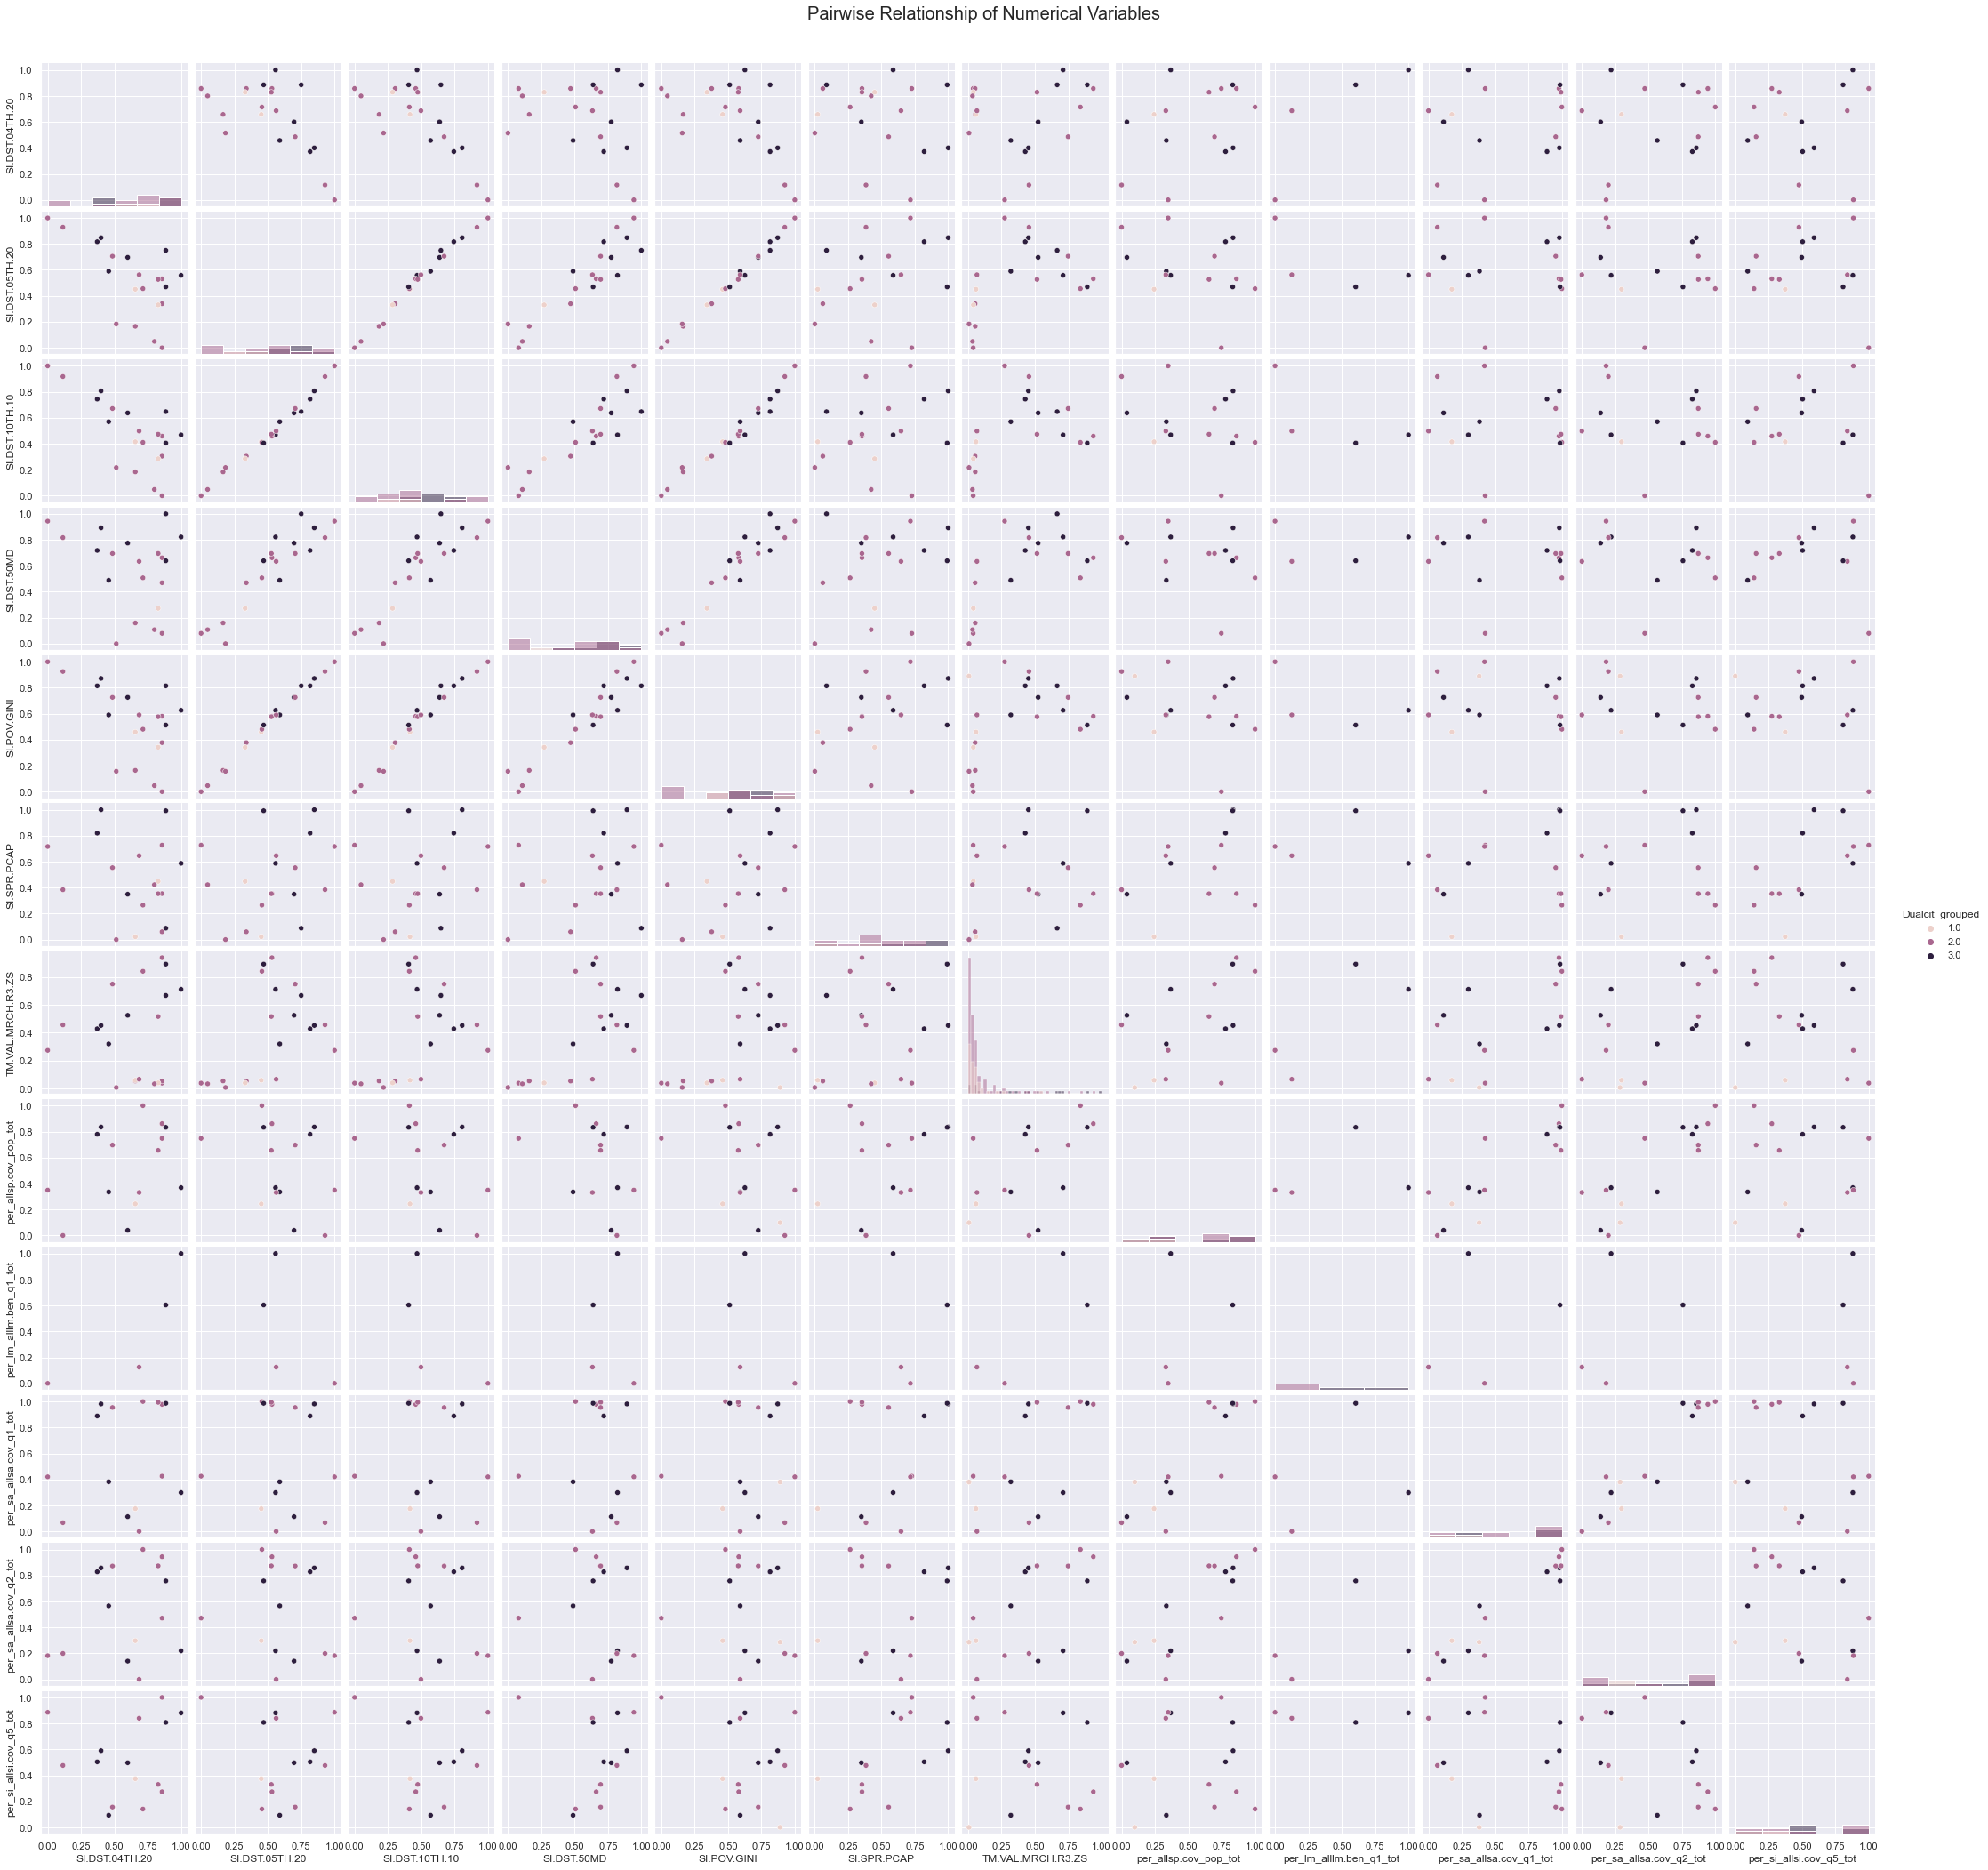

In [138]:
# Pairwise Relationship of Numerical Variables
sns.set()

# Setting pairplot
sns.pairplot(wdi_test[chi2_selected_features], diag_kind="hist",hue='Dualcit_grouped')

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)


In [112]:
#series['Indicator Name'].str.extract('((?<=\().+(?=\)))').head(50)
ind.loc[ind['Series Code'].isin(wdi_test.dropna(axis=1).columns)]

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
19,AG.LND.TOTL.K2,Environment: Land use,Land area (sq. km),NaN,"Land area is a country's total area, excluding area under inland water bodies, national claims to continental shelf, and exclusive economic zones. In most cases the definition of inland water bodi...",NaN,Annual,NaN,NaN,Sum,...,NaN,NaN,"Food and Agriculture Organization, electronic files and web site.",Total land area does not include inland water bodies such as major rivers and lakes. Variations from year to year may be due to updated or revised data rather than to change in area.,Land area is particularly important for understanding an economy's agricultural capacity and the environmental effects of human activity. Innovations in satellite mapping and computer databases ha...,NaN,NaN,NaN,CC BY-4.0,NaN
199,EG.ELC.ACCS.ZS,Environment: Energy production & use,Access to electricity (% of population),NaN,"Access to electricity is the percentage of population with access to electricity. Electrification data are collected from industry, national surveys and international sources.",NaN,Annual,NaN,NaN,Weighted average,...,NaN,NaN,"World Bank Global Electrification Database from ""Tracking SDG 7: The Energy Progress Report"" led jointly by the custodian agencies: the International Energy Agency (IEA), the International Renewab...",Data for access to electricity are collected among different sources: mostly data from nationally representative household surveys (including national censuses) were used. Survey sources include D...,Maintaining reliable and secure electricity services while seeking to rapidly decarbonize power systems is a key challenge for countries throughout the world. More and more countries are becoming ...,NaN,NaN,NaN,CC BY-4.0,NaN
268,EN.POP.DNST,Environment: Density & urbanization,Population density (people per sq. km of land area),NaN,"Population density is midyear population divided by land area in square kilometers. Population is based on the de facto definition of population, which counts all residents regardless of legal sta...",NaN,Annual,NaN,NaN,Weighted average,...,NaN,NaN,Food and Agriculture Organization and World Bank population estimates.,"Population density is midyear population divided by land area in square kilometers. This ratio can be calculated for any territorial unit for any point in time, depending on the source of the popu...",Population estimates are usually based on national population censuses. Estimates for the years before and after the census are interpolations or extrapolations based on demographic models. Errors...,NaN,NaN,NaN,CC BY-4.0,NaN
499,IQ.SPI.PIL1,Public Sector: Policy & institutions,Statistical performance indicators (SPI): Pillar 1 data use score (scale 0-100),"The data use overall score is a composite score covering five dimensions: (i) the legislature, (ii) the executive branch, (iii) civil society (including sub-national actors), (iv) academia and (v)...","The data use overall score is a composite score measuring the demand side of the statistical system. The data use pillar is segmented by five types of users: (i) the legislature, (ii) the execut...",NaN,Annual,NaN,NaN,Weighted average,...,"For pillar 1 on data use, data is collected from four distinct sources. The World Bank supplies data for indicators on availability of comparable poverty data (from the World Bank’s Povcalnet syst...",NaN,"Statistical Performance Indicators, The World Bank (https://datacatalog.worldbank.org/dataset/statistical-performance-indicators)",Weighted average of statistical performance indicators related to data use. Scores range from 0-100 with 100 representing the best score.,"The data use (outcome) pil

In [101]:
wdi_pivoted = wdi.pivot(index='Country Code',columns='Indicator Code', values='2019').dropna(how='all',axis=1)
dual_city_groups_2019 = df.loc[df.Year==2019].set_index('ISO3')[['Dualcit_grouped']]
wdi_test = wdi_pivoted.join(dual_city_groups_2019).dropna(subset=['Dualcit_grouped'])


scaler = StandardScaler()
wdi_test.iloc[:,:-1] = scaler.fit_transform(wdi_test.iloc[:,:-1])


wdi_test.sample(frac=0.3,random_state=42)
X_train, X_test, y_train, y_test = train_test_split(wdi_test.iloc[:,:-1].values,
                                                    wdi_test['Dualcit_grouped'].values, 
                                                    test_size=0.33, 
                                                    random_state=42)


kmeans_kwargs = {"init": "random","n_init": 20,"max_iter": 1000,"random_state": 1984}
cut_off=0.5
maxvars=3
k=4

cols=list(wdi_test.columns)
results_for_each_k=[]
vars_for_each_k={}
selected_variables=[]
counter=0




while(len(selected_variables)<maxvars):
    results=[]
    for col in cols:
        scols=[]
        scols.extend(selected_variables)
        scols.append(col) 
        kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
        kmeans.fit(wdi_test[scols])
        
        accuracy_score(y_true, y_pred)
        
        results.append(silhouette_score(wdi_test[scols], kmeans.predict(wdi_test[scols])))
        
        counter+=1
        if counter % 100==0:
            print(counter)
            
    selected_var=cols[np.argmax(results)]
    selected_variables.append(selected_var)
    cols.remove(selected_var)
    
    
results_for_each_k.append(max(results))
vars_for_each_k[k]=selected_variables


/Users/Lucas/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/extmath.py:770: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/Lucas/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/extmath.py:711: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
best_k=np.argmax(results_for_each_k)+kmin
#you can also force a value for k
#best_k=3
selected_variables=vars_for_each_k[best_k]
kmeans = KMeans(n_clusters=best_k, **kmeans_kwargs)
kmeans.fit(df[selected_variables])
clusters=kmeans.predict(df[selected_variables])

%matplotlib inline

fig = plt.figure(figsize=(15,15))
#plt.rcParams['font.size'] = 22
ax = plt.axes(projection="3d")
z_points = df_[selected_variables[0]]
x_points = df_[selected_variables[1]]
y_points = df_[selected_variables[2]]
f1=ax.scatter3D(x_points, y_points, z_points, c=clusters,cmap='Accent',s=300);

ax.set_xlabel(selected_variables[0],fontsize = 20)
ax.set_ylabel(selected_variables[1],fontsize = 20)
ax.set_zlabel(selected_variables[2],fontsize = 20)
ax.legend(clusters)

plt.title('KMeans used on the Europe Datasets',fontsize = 24)
plt.show()